# 💰 Análise de dados de clientes bancários
Essa base de dados foi retirada do [Kaggle](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn)
Ela possui dados referentes à clientes de um banco, nela é possível verificar algumas caracteríticas sobre comportamentos dos clientes.  
Os bancos utilizam esses dados majoritariamente para verificar a rotatividade de seus clientes, assim como criar programas de fidelidade e encontrar estratégias para encontrar novos clientes.  

O intuito dessa análise é explorar esses dados buscar alguns insights e ir evoluindo ela aos poucos.

# 🔧 Ferramentas utilizadas
* Python
* Jupyter lab(ou qualquer interpretador de código de sua preferência).

# Importação das bibliotecas

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Importação de dados

In [25]:
df_churns = pd.read_csv('Customer-Churn-Records.csv', header=0)

# Exploração dos dados

In [26]:
df_churns.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


In [27]:
df_churns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [28]:
#Alterando o tipo da coluna CustomerId
df_churns['CustomerId'] = df_churns['CustomerId'].astype(str)
df_churns['CustomerId']

0       15634602
1       15647311
2       15619304
3       15701354
4       15737888
          ...   
9995    15606229
9996    15569892
9997    15584532
9998    15682355
9999    15628319
Name: CustomerId, Length: 10000, dtype: object

In [29]:
df_churns.describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [20]:
df_churns.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [21]:
df_churns.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

# Correlação

In [46]:
#Criando uma cópia do dataframe para criar os logs para validar as correlações.
df_churns_corr = df_churns

## Correlação entre idade e saída do banco

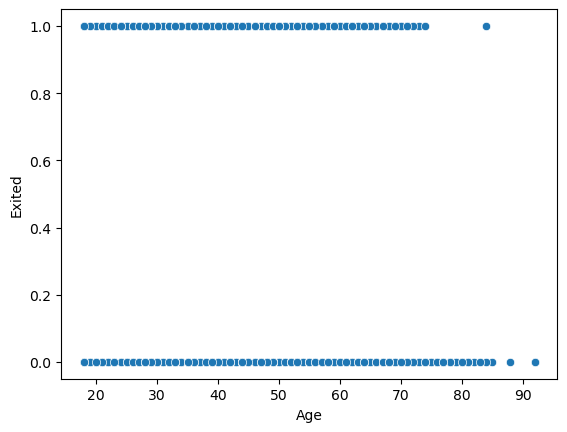

Valor da correlação entre idade e score de crédito 0.28529646384066826


In [30]:
#Correlação simples entre idade e score de crédit
sns.scatterplot(data=df_churns,x='Age',y='Exited')
plt.show()
print(f"Valor da correlação entre idade e score de crédito {df_churns['Age'].corr(df_churns['Exited'])}")

Vamos verificar se a correlação é não linear tirando o log de uma das variáveis

Valor da correlação entre idade e score de crédito 0.28529646384066826
Valor da correlação entre o log de idade e o score de crédito 0.2940867887551477


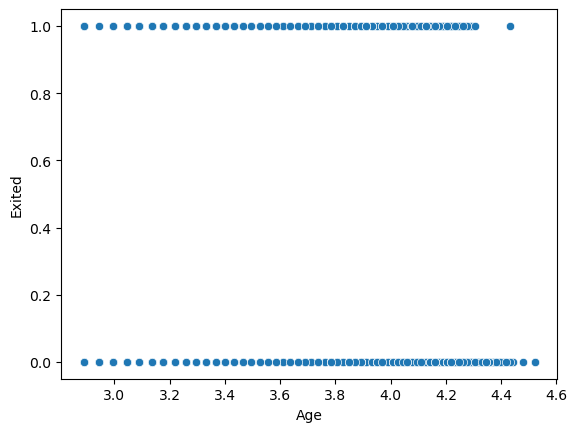

In [41]:
print(f"Valor da correlação entre idade e score de crédito {df_churns['Age'].corr(df_churns['Exited'])}")
log_Age = np.log(df_churns['Age'])
print(f"Valor da correlação entre o log de idade e o score de crédito {log_Age.corr(df_churns['Exited'])}")

#Visualização
sns.scatterplot(data=df_churns,x=log_Age,y='Exited')
plt.show()

## Correlação entre saída e tempo de banco

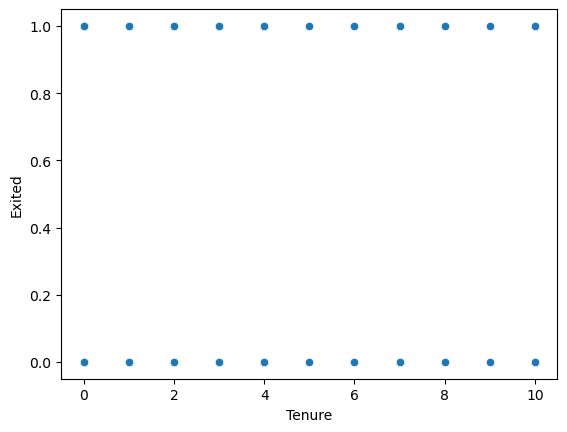

Correlação entre a idade e o saldo -0.013655799112819538


In [34]:
sns.scatterplot(data=df_churns,x='Tenure',y='Exited')
plt.show()

print(f"Correlação entre a idade e o saldo {df_churns['Tenure'].corr(df_churns['Exited'])}")

Vamos testar com o log de idade também

D:\anaconda3\envs\py310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


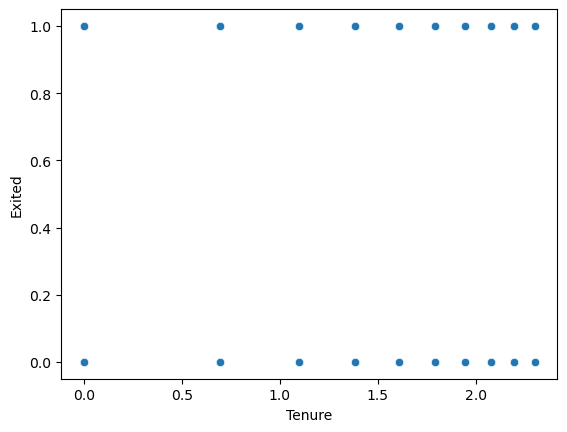

Correlação entre o log de idade e o saldo nan


D:\anaconda3\envs\py310\lib\site-packages\numpy\lib\_function_base_impl.py:2767: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


In [45]:
log_Tenure = np.log(df_churns['Tenure'])
sns.scatterplot(data=df_churns,x=log_Tenure,y='Exited')
plt.show()

print(f"Correlação entre o log de idade e o saldo {df_churns['Exited'].corr(log_Tenure)}")